In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import sys
from pathlib import Path

import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots

# torch.set_printoptions(precision=8, sci_mode=False, edgeitems=5)
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)
# Increase the resolution of all the plots below
matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots

# from varz import Vars, namespace
from wbml import experiment, out, plot

In [26]:
dataset = "Adult"
pvi_type = "GVI"

exps = {'mfvi': "saved_results/Adult/GVI/07-23-16.24.54_seq-mfvi-adult-1c-10g-1000l-nealprior-128b-gvi-lr0-05", 
        'gi': "saved_results/Adult/GVI/07-23-16.29.54_seq-pvi-adult-1c-10g-1000l-nealprior-128b-100m-gvi-10s"}

# experiments = {}
# for pvi_type, exps in experiments.items():A

In [27]:
logs = {}
for k, e in exps.items():
    logs[k] = {}
    for log_name in os.listdir(e):
        
        name = log_name.split('_')[0]
        logs[k][name] = pd.read_csv(os.path.join(e, log_name))

In [28]:
server: pd.DataFrame = logs['mfvi']['server']
server

,communications,iteration,train_mll,train_acc,test_mll,test_acc
0,0,0,-0.693181,0.238477,-0.693181,0.242527
1,2,1,-0.321718,0.856064,-0.330396,0.849611
2,4,2,-0.311316,0.858265,-0.324025,0.852068
3,6,3,-0.309228,0.858547,-0.320955,0.851863
4,8,4,-0.308034,0.858905,-0.322470,0.852682
5,10,5,-0.307202,0.858982,-0.319966,0.852580
6,12,6,-0.305166,0.860313,-0.318064,0.853092
7,14,7,-0.305486,0.860082,-0.319226,0.852375
8,16,8,-0.304227,0.860518,-0.318018,0.852887
9,18,9,-0.302623,0.861029,-0.317176,0.852887


In [8]:
# plt.rcParams.update(bundles.neurips2022(usetex=False))
# plt.rcParams.update(tueplots.figsizes.icml2022_full())

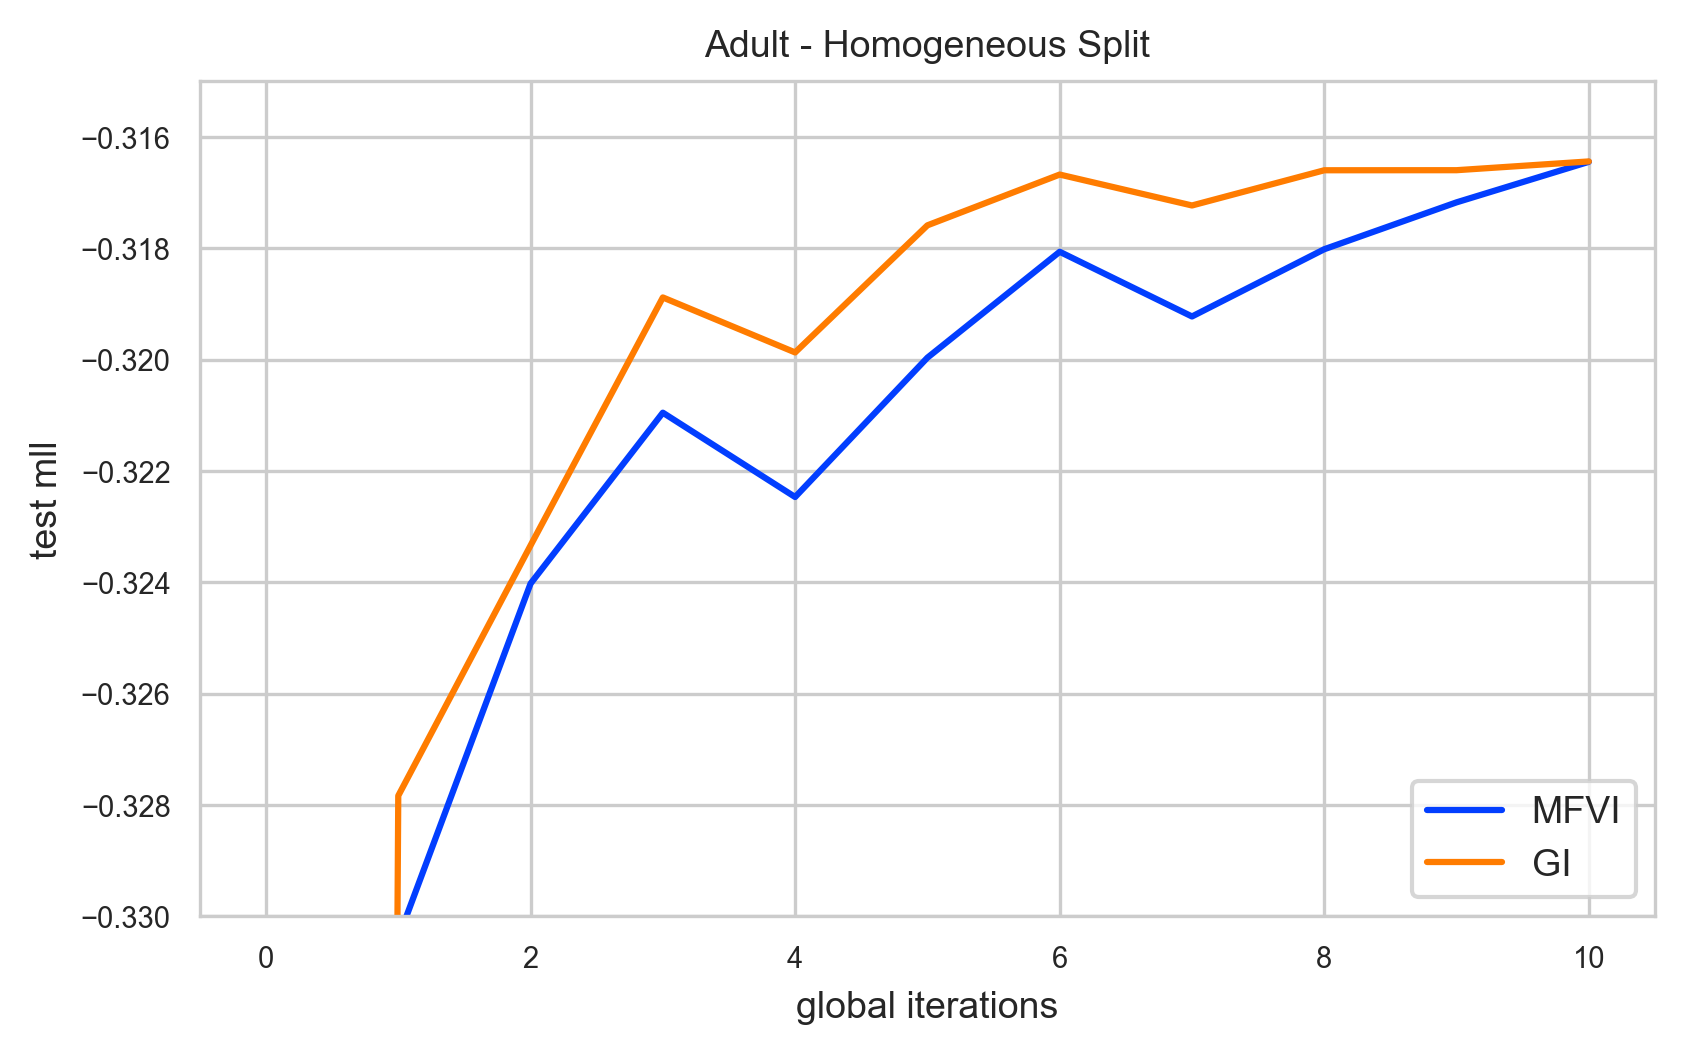

In [54]:
from tueplots import bundles, fontsizes, figsizes

with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    for k, d in logs.items():
        server = logs[k]['server']
        sns.lineplot(x=server.iteration, y=server.test_mll, label=f'{k}'.upper(), ax=ax)
    
    ax.set_title('Adult - Homogeneous Split')
    ax.set_ylim((-0.33, -0.315))
    ax.set_ylabel('test mll')
    ax.set_xlabel('global iterations')
    # plot.tweak(ax, legend=False)
    ax.legend(loc="lower right", prop={"size": 9})
    plt.show()

In [51]:
logs['mfvi']['client0']

,iteration,vfe,ll,kl,error
0,0,-0.854713,-0.693490,6299.443359,0.750000
1,49,-0.692419,-0.665633,1046.601807,0.234375
2,99,-0.429936,-0.419296,415.734924,0.257812
3,149,-0.420759,-0.409542,438.278198,0.289062
4,199,-0.462939,-0.452413,411.282654,0.312500
...,...,...,...,...,...
205,799,-0.328760,-0.315942,500.851562,0.125000
206,849,-0.296218,-0.283418,500.108307,0.132812
207,899,-0.368285,-0.355319,506.613190,0.195312
208,949,-0.275744,-0.262751,507.658356,0.132812


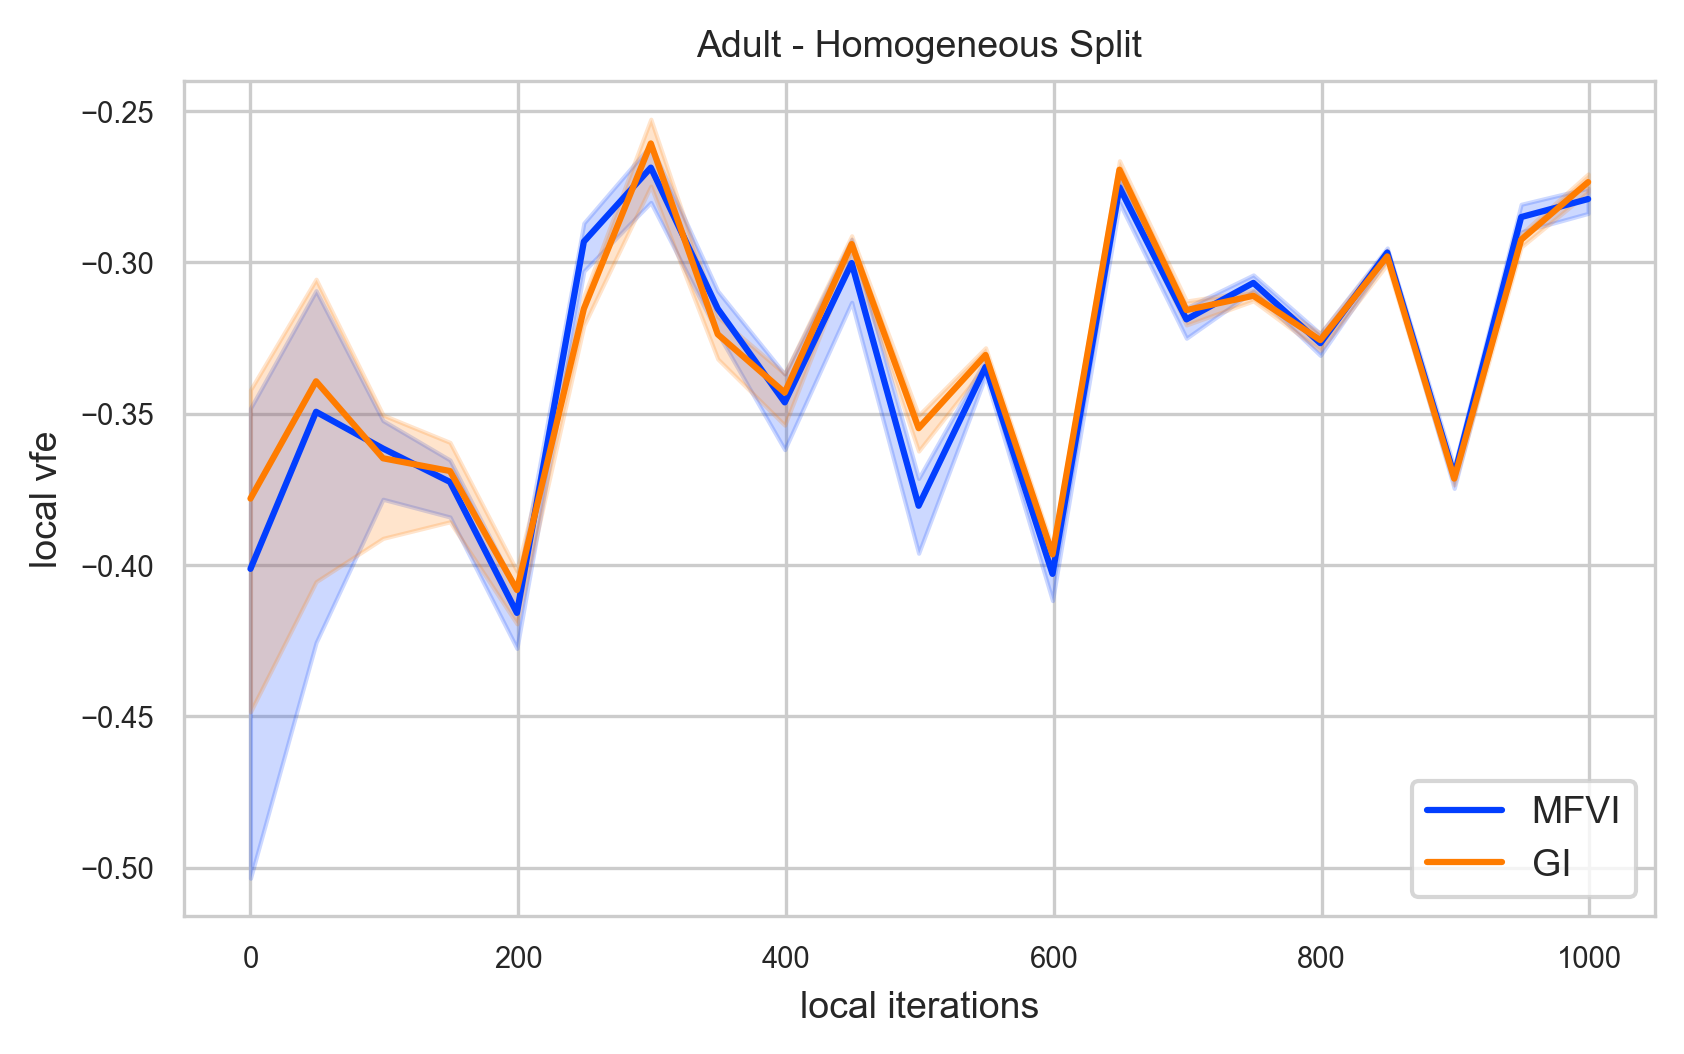

In [55]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    for k, d in logs.items():
        client0 = logs[k]['client0']
        sns.lineplot(x=client0.iteration, y=client0.vfe, label=f'{k}'.upper(), ax=ax)
    
    ax.set_title('Adult - Homogeneous Split')
    ax.set_ylabel('local vfe')
    ax.set_xlabel('local iterations')
    ax.legend(loc="lower right", prop={"size": 9})
    plt.show()

In [8]:
# Load dictionary of vs state
# vs_path = os.path.join(exp_dir, "model/_vs.pt")
# vs_state_dict = torch.load(os.path.join(main_dir, vs_path))